<a href="https://colab.research.google.com/github/venkatkp50/Espnet/blob/main/ESPnet2_course_2023_dataprep_a0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/ftshijt/notebook/blob/master/ESPnet2/Course/CMU_SpeechProcessing_Spring2023/assignment0_data-prep.ipynb

In [1]:
!git clone --depth 5 https://github.com/espnet/espnet

Cloning into 'espnet'...
remote: Enumerating objects: 8171, done.
remote: Counting objects: 100% (8171/8171), done.
remote: Compressing objects: 100% (5806/5806), done.
remote: Total 8171 (delta 2736), reused 4189 (delta 1466), pack-reused 0 (from 0)
Receiving objects: 100% (8171/8171), 19.37 MiB | 7.59 MiB/s, done.
Resolving deltas: 100% (2736/2736), done.
Updating files: 100% (12429/12429), done.


In [3]:
# It takes 30 seconds
%cd /content/espnet/tools
!./setup_anaconda.sh anaconda espnet 3.9

!./installers/install_sph2pipe.sh
!pip install typeguard==2.13.0

/content/espnet/tools
Channels:
 - defaults
Platform: linux-64
Solving environment: \ | done

# All requested packages already installed.

Channels:
 - defaults
Platform: linux-64
Solving environment: - \ done

# All requested packages already installed.

make: Entering directory '/content/espnet/tools/sph2pipe-2.5'
make: Nothing to be done for 'all'.
make: Leaving directory '/content/espnet/tools/sph2pipe-2.5'


In [4]:
!pip install kaldiio soundfile tqdm librosa matplotlib IPython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.4 MB/s eta 0:00:00


In [5]:
!git clone https://github.com/kaldi-asr/kaldi.git

Cloning into 'kaldi'...
remote: Enumerating objects: 116057, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 116057 (delta 56), reused 38 (delta 38), pack-reused 115981 (from 4)
Receiving objects: 100% (116057/116057), 122.53 MiB | 23.44 MiB/s, done.
Resolving deltas: 100% (89406/89406), done.


In [6]:

%cd /content/espnet/egs2/an4/asr1
!ls


/content/espnet/egs2/an4/asr1
asr.sh	cmd.sh	conf  db.sh  local  path.sh  pyscripts	README.md  run.sh  scripts  steps  utils


In [7]:
!./local/data.sh

2025-02-13T07:58:24 (data.sh:23:main) ./local/data.sh 
2025-02-13T07:58:25 (data.sh:39:main) stage 1: Data Download
local/download_and_untar.sh: downloading data (64 MB) from http://www.speech.cs.cmu.edu/databases/an4//an4_sphere.tar.gz.
--2025-02-13 07:58:25--  http://www.speech.cs.cmu.edu/databases/an4//an4_sphere.tar.gz
Resolving www.speech.cs.cmu.edu (www.speech.cs.cmu.edu)... 128.2.220.147
Connecting to www.speech.cs.cmu.edu (www.speech.cs.cmu.edu)|128.2.220.147|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-02-13 07:58:25 ERROR 404: Not Found.

local/download_and_untar.sh: error executing wget http://www.speech.cs.cmu.edu/databases/an4//an4_sphere.tar.gz
2025-02-13T07:58:25 (data.sh:42:main) Failed to download from the original site, try a backup site.
local/download_and_untar.sh: downloading data (64 MB) from https://huggingface.co/datasets/espnet/an4/resolve/main/an4_sphere.tar.gz.
--2025-02-13 07:58:25--  https://huggingface.co/datasets/espnet/an4

In [9]:
!ls -1 data/train_nodev/

spk2utt
text
utt2spk
wav.scp


In [10]:
!head -n 10 data/train_nodev/wav.scp

fkai-an311-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fkai/an311-fkai-b.sph |
fkai-an312-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fkai/an312-fkai-b.sph |
fkai-an313-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fkai/an313-fkai-b.sph |
fkai-an314-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fkai/an314-fkai-b.sph |
fkai-an315-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fkai/an315-fkai-b.sph |
fkai-cen1-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fkai/cen1-fkai-b.sph |
fkai-cen2-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fkai/cen2-fkai-b.sph |
fkai-cen3-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fkai/cen3-fkai-b.sph |
fkai-cen4-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fkai/cen4-fkai-b.sph |
fkai-cen5-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fkai/cen5-fkai-b.sph |


In [11]:
!head -n 10 data/train_nodev/text

fkai-an311-b ERASE I S L F THIRTY EIGHT
fkai-an312-b ERASE Z Y G N P EIGHT HUNDRED AND TWENTY THREE
fkai-an313-b ERASE T M A Z X TWO THOUSAND FIVE HUNDRED AND FIFTY TWO
fkai-an314-b A M S J SEVEN THOUSAND ONE HUNDRED AND EIGHTY SIX
fkai-an315-b ENTER FIFTY ONE
fkai-cen1-b I V A R S O N
fkai-cen2-b K A R L A
fkai-cen3-b ONE THOUSAND
fkai-cen4-b M O R E W O O D
fkai-cen5-b P I T T S B U R G H


0it [00:00, ?it/s]

audio: fcaw-an406-b


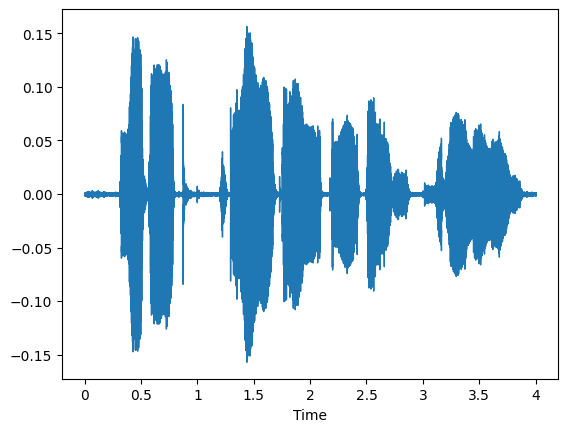

1it [00:26, 26.24s/it]

audio: fcaw-an407-b


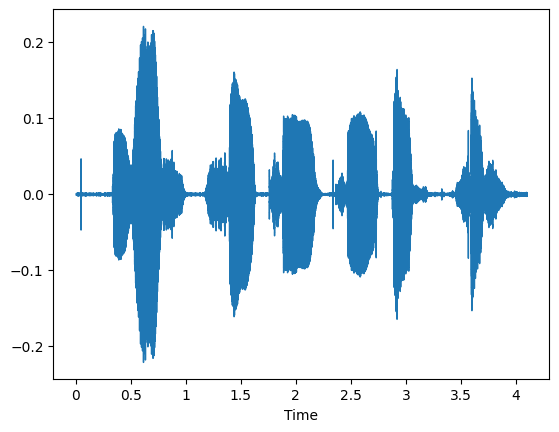

2it [00:27, 11.26s/it]

audio: fcaw-an408-b


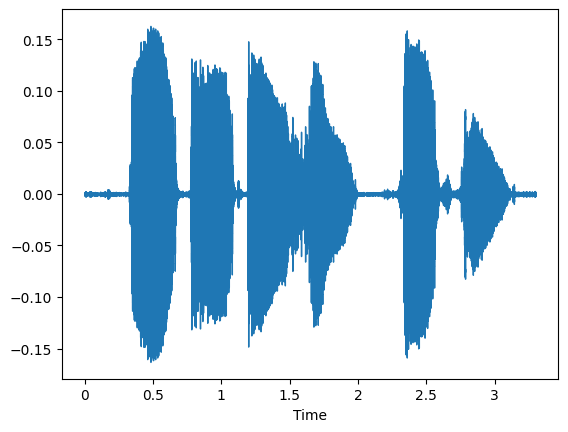

3it [00:27,  6.44s/it]

audio: fcaw-an409-b


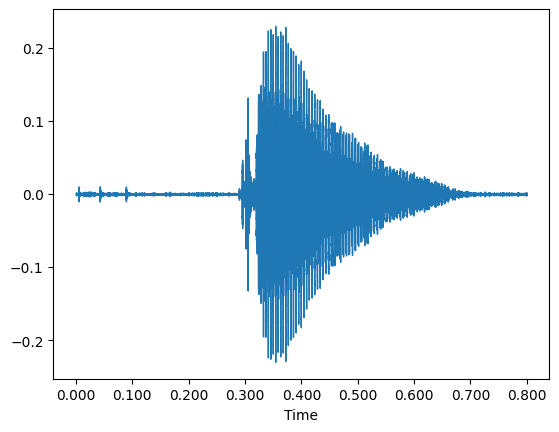

4it [00:28,  4.09s/it]

audio: fcaw-an410-b


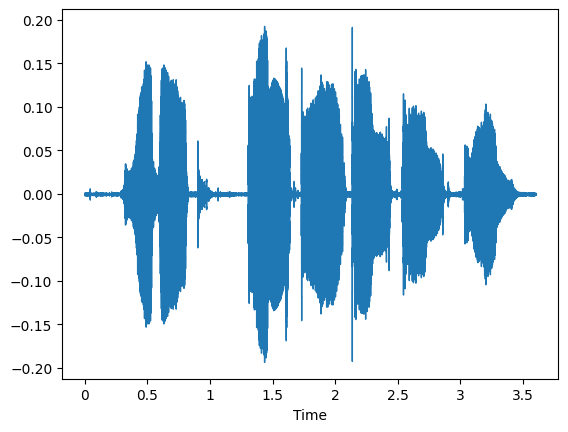

4it [00:28,  7.22s/it]


In [14]:


import soundfile
import kaldiio
import matplotlib.pyplot as plt
from io import BytesIO
from tqdm import tqdm
import librosa.display
import numpy as np
import IPython.display as ipd
import os

os.environ['PATH'] = os.environ['PATH'] + ":/content/espnet/tools/sph2pipe"

wavscp = open("data/test/wav.scp", "r")

num_wav = 5
count = 1
for line in tqdm(wavscp):
  utt_id, wavpath = line.strip().split(None, 1)
  with kaldiio.open_like_kaldi(wavpath, "rb") as f:
    with BytesIO(f.read()) as g:
      wave, rate = soundfile.read(g, dtype=np.float32)
      # wave, rate = soundfile.read(g)
      print("audio: {}".format(utt_id))
      librosa.display.waveshow(y=wave, sr=rate)
      plt.show()

      ipd.display(ipd.Audio(wave, rate=rate)) # load a NumPy array
      if count == num_wav:
        break
      count += 1



In [15]:
%cd /content/espnet/egs2/totonac/asr1
!ls

/content/espnet/egs2/totonac/asr1
asr.sh	cmd.sh	conf  db.sh  local  path.sh  pyscripts	RESULTS.md  run.sh  scripts  steps  utils


In [16]:

!. ../../../tools/activate_python.sh && pip install soundfile # we need soundfile for necessary processing

!./local/data.sh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 58.4 MB/s eta 0:00:00
2025-02-13T08:05:09 (data.sh:38:main) data preparation started
2025-02-13T08:05:09 (data.sh:41:main) stage1: Download data to downloads
--2025-02-13 08:05:09--  https://www.openslr.org/resources/107/Amith-Lopez_Totonac-recordings-northern-Puebla-and-adjacent-Veracruz_Metadata.xml
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://openslr.elda.org/resources/107/Amith-Lopez_Totonac-recordings-northern-Puebla-and-adjacent-Veracruz_Metadata.xml [following]
--2025-02-13 08:05:10--  https://openslr.elda.org/resources/107/Amith-Lopez_Totonac-recordings-northern-Puebla-and-adjacent-Veracruz_Metadata.xml
Resolving openslr.elda.org (openslr.elda.org)... 141.94.109.138, 2001:41d0:203:ad8

In [17]:

!ls -l data
!echo  "--------------------------"
!ls -l data/train
!echo  "------------- wav.scp file -------------"
!head -n 10 data/train/wav.scp
!echo  "------------- Segment file -------------"
!head -n 10 data/train/segments


total 12
drwxr-xr-x 3 root root 4096 Feb 13 08:09 dev
drwxr-xr-x 3 root root 4096 Feb 13 08:09 test
drwxr-xr-x 3 root root 4096 Feb 13 08:09 train
--------------------------
total 1372
-rw-r--r-- 1 root root      0 Feb 13 08:09 name2spk
-rw-r--r-- 1 root root 385192 Feb 13 08:09 segments
-rw-r--r-- 1 root root 211486 Feb 13 08:09 spk2utt
-rw-r--r-- 1 root root 489620 Feb 13 08:09 text
-rw-r--r-- 1 root root 298272 Feb 13 08:09 utt2spk
-rw-r--r-- 1 root root  11695 Feb 13 08:09 wav.scp
------------- wav.scp file -------------
2018-07-26-a sox -t wavpcm "downloads/Conversaciones/Botany/Audios/Zongo_Botan_SLC388-OLF385_Cannaceae-Canna-spp_2018-07-26-a.wav" -c 1 -r 16000 -t wavpcm - |
2018-07-26-b sox -t wavpcm "downloads/Conversaciones/Botany/Audios/Zongo_Botan_SLC388-OLF385_Heliconiaceae-Heliconia-spp_2018-07-26-b.wav" -c 1 -r 16000 -t wavpcm - |
2018-07-26-c sox -t wavpcm "downloads/Conversaciones/Botany/Audios/Zongo_Botan_SLC388-OLF385_Piperaceae-Piper-auritum_2018-07-26-c.wav" -c 1 -r